<a href="https://colab.research.google.com/github/jlopez00001/M-todos-num-ricos/blob/main/M%C3%A9todos_num%C3%A9ricos_3parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRACIÓN NUMERICA (FORMULAS NEWTON-COTES )

In [ ]:
import sympy as sp  # importamos sympy


x = sp.Symbol('x') # estamos definiendo la variable simbolica x

f = sp.sin(x)  # definimo la función a integrar


def regla_trapezoidal(f, a, b): # Trapezoidal (n=1)
    h = b - a
    return (h / 2) * (f.subs(x, a) + f.subs(x, b))


def regla_simpson(f, a, b): #  formula de Simpson 1/3 (n=2)
    h = (b - a) / 2
    return (h / 3) * (f.subs(x, a) + 4*f.subs(x, a + h) + f.subs(x, b))


def regla_tres_octavos(f, a, b): # Simpson 3/8 (n=3)
    h = (b - a) / 3
    return (3*h / 8) * (f.subs(x, a) + 3*f.subs(x, a + h) + 3*f.subs(x, a + 2*h) + f.subs(x, b))


def newton_cotes_cerrada_n4(f, a, b): # Newton-Cotes cerrada n=4
    h = (b - a) / 4
    puntos = [a + i*h for i in range(5)]
    coef = [7, 32, 12, 32, 7]
    suma = sum(c * f.subs(x, xi) for c, xi in zip(coef, puntos))
    return (2*h / 45) * suma

# Newton-Cotes abiertas

def newton_cotes_abierta_n0(f, a, b):
    h = (b - a) / 2
    return (b - a) * f.subs(x, a + h)

def newton_cotes_abierta_n1(f, a, b):
    h = (b - a) / 3
    x1 = a + h
    x2 = a + 2*h
    return (3*h / 2) * (f.subs(x, x1) + f.subs(x, x2))

def newton_cotes_abierta_n2(f, a, b):
    h = (b - a) / 4
    puntos = [a + h, a + 2*h, a + 3*h]
    coef = [2, -1, 2]
    return (4*h / 3) * sum(c*f.subs(x, xi) for c, xi in zip(coef, puntos))

def newton_cotes_abierta_n3(f, a, b):
    h = (b - a) / 5
    puntos = [a + i*h for i in range(1, 5)]
    coef = [11, 1, 1, 11]
    return (5*h / 24) * sum(c*f.subs(x, xi) for c, xi in zip(coef, puntos))

# Intervalo de integración
a = 0
b = 3.1416/4

# Mostrar resultados (evalf convierte el resultado a decimal)
print("CERRADAS:")
print("Trapezoidal:", regla_trapezoidal(f, a, b).evalf())
print("Simpson 1/3:", regla_simpson(f, a, b).evalf())
print("Simpson 3/8:", regla_tres_octavos(f, a, b).evalf())
print("Newton-Cotes cerrada n=4:", newton_cotes_cerrada_n4(f, a, b).evalf())

print("\nABIERTAS:")
print("Abierta n=0:", newton_cotes_abierta_n0(f, a, b).evalf())
print("Abierta n=1:", newton_cotes_abierta_n1(f, a, b).evalf())
print("Abierta n=2:", newton_cotes_abierta_n2(f, a, b).evalf())
print("Abierta n=3:", newton_cotes_abierta_n3(f, a, b).evalf())

CERRADAS:
Trapezoidal: 0.277681342960815
Simpson 1/3: 0.292933937061992
Simpson 3/8: 0.292912001466899
Newton-Cotes cerrada n=4: 0.292894481235902

ABIERTAS:
Abierta n=0: 0.300560234112581
Abierta n=1: 0.297988887635593
Abierta n=2: 0.292859957388073
Abierta n=3: 0.292870526478417


REGLA COMPUESTA DE SIMPSON

Aproximación con n=2: 56.76958295257789
Valor exacto (exp(2)): 53.598150033144236
Error absoluto: 3.1714329194336557


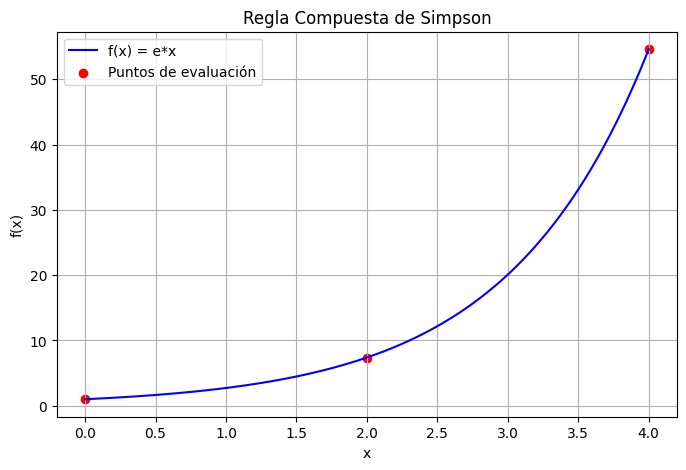

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Definición de la función a integrar
def f(x):
    return np.exp(x)

# Regla de Simpson compuesta
def simpson_compuesta(f, a, b, n):# recibe como parametros la función f un intervalo y n entero par
    if n % 2 != 0:                 # verifica que n sea par
        raise ValueError("n debe ser par")
    h = (b - a) / n                                #divición del intervalo
    x = np.linspace(a, b, n + 1)
    fx = f(x)
    S = fx[0] + fx[-1] + 4 * sum(fx[1:-1:2]) + 2 * sum(fx[2:-2:2])
    return (h / 3) * S

# Parámetros del ejemplo
a = 0
b = 4
n = 2# Número de subintervalos (par)

# Aproximación y valor exacto
aprox = simpson_compuesta(f, a, b, n)
exacto = np.exp(b) - np.exp(a)
error = abs(exacto - aprox)

# Mostrar resultados
print(f"Aproximación con n={n}: {aprox}")
print(f"Valor exacto (exp(2)): {exacto}")
print(f"Error absoluto: {error}")

# Gráfica
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Puntos usados en la regla de Simpson
x_simpson = np.linspace(a, b, n + 1)
y_simpson = f(x_simpson)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = e*x", color='blue')
plt.scatter(x_simpson, y_simpson, color='red', label='Puntos de evaluación')
plt.title("Regla Compuesta de Simpson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

MÉTODO DE EULER

Paso  t        Aproximación    Valor exacto    Error absoluto 
0     0.0000   0.50000000      0.50000000      0.00000000     
1     0.2000   0.80000000      0.82929862      0.02929862     
2     0.4000   1.15200000      1.21408765      0.06208765     
3     0.6000   1.55040000      1.64894060      0.09854060     
4     0.8000   1.98848000      2.12722954      0.13874954     
5     1.0000   2.45817600      2.64085909      0.18268309     
6     1.2000   2.94981120      3.17994154      0.23013034     
7     1.4000   3.45177344      3.73240002      0.28062658     
8     1.6000   3.95012813      4.28348379      0.33335566     
9     1.8000   4.42815375      4.81517627      0.38702251     
10    2.0000   4.86578450      5.30547195      0.43968745     


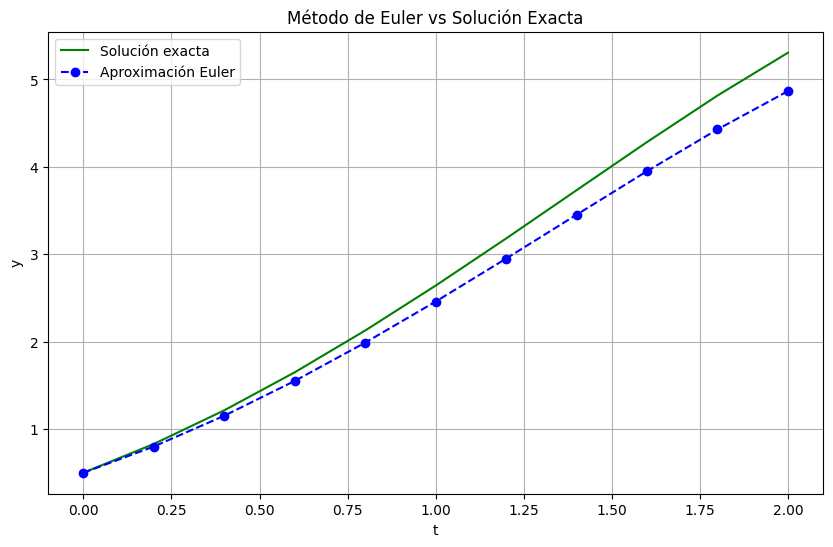

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Función f(t, y) = y' = f(t, y) debe dpser de está forma
def f(t, y):
    return y - t**2 + 1

# Solución exacta para comparación  , definimos la solución exacta para poder calcular el error
def y_exacta(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

# Algoritmo 5.1 - Método de Euler
def metodo_euler(f, t0, y0, b, h):
    n = int((b - t0) / h)
    t_vals = np.zeros(n + 1)
    y_vals = np.zeros(n + 1)
    t_vals[0] = t0
    y_vals[0] = y0

    for i in range(n):
        t_vals[i+1] = t_vals[i] + h
        y_vals[i+1] = y_vals[i] + h * f(t_vals[i], y_vals[i])

    return t_vals, y_vals

# Parámetros
t0 = 0
y0 = 0.5
b = 2
h = 0.2


t_vals, y_approx = metodo_euler(f, t0, y0, b, h) #llámamos a la función

# Comparar con la solución exacta
y_real = y_exacta(t_vals)
error_abs = np.abs(y_real - y_approx)

# Mostrar resultados en tabla
print(f"{'Paso':<5} {'t':<8} {'Aproximación':<15} {'Valor exacto':<15} {'Error absoluto':<15}")
for i in range(len(t_vals)):
    print(f"{i:<5} {t_vals[i]:<8.4f} {y_approx[i]:<15.8f} {y_real[i]:<15.8f} {error_abs[i]:<15.8f}")

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_real, label="Solución exacta", color='green')
plt.plot(t_vals, y_approx, 'o--', label="Aproximación Euler", color='blue')
plt.title("Método de Euler vs Solución Exacta")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

SERIE DE TAYLOR

Paso  t        Aproximación    Valor exacto    Error absoluto 
0     0.0000   0.50000000      0.50000000      0.00000000     
1     0.2000   0.83000000      0.82929862      0.00070138     
2     0.4000   1.21580000      1.21408765      0.00171235     
3     0.6000   1.65207600      1.64894060      0.00313540     
4     0.8000   2.13233272      2.12722954      0.00510318     
5     1.0000   2.64864592      2.64085909      0.00778683     
6     1.2000   3.19134802      3.17994154      0.01140648     
7     1.4000   3.74864458      3.73240002      0.01624457     
8     1.6000   4.30614639      4.28348379      0.02266261     
9     1.8000   4.84629860      4.81517627      0.03112233     
10    2.0000   5.34768429      5.30547195      0.04221234     


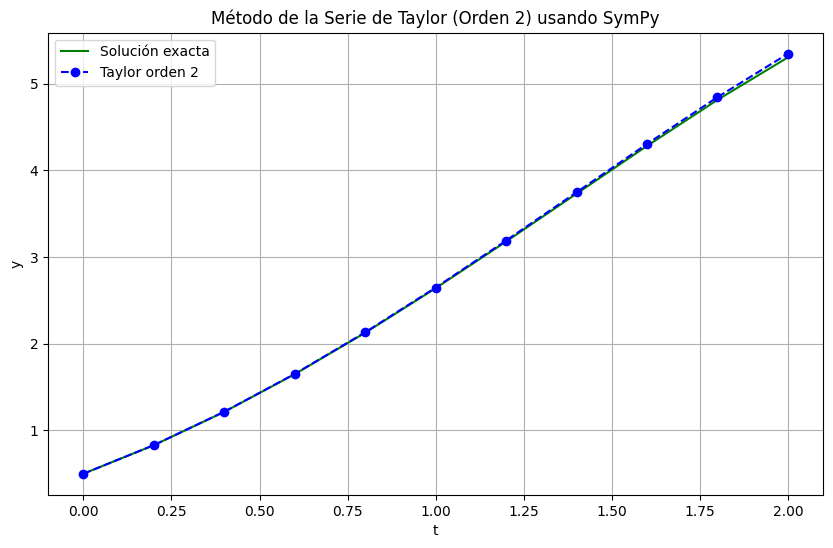

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# ---------- Preparar derivadas con sympy ----------
t, y = sp.symbols('t y')
f_expr = y - t**2 + 1

# Calcular la derivada total d/dt f(t, y(t)) usando regla de la cadena
# df/dt = ∂f/∂t + ∂f/∂y * dy/dt
df_dt = sp.diff(f_expr, t) + sp.diff(f_expr, y) * f_expr  # y' = f

# Convertir a funciones de Python
f_func = sp.lambdify((t, y), f_expr, modules='numpy')
dfdt_func = sp.lambdify((t, y), df_dt, modules='numpy')


def y_exacta(t):    #solución exacta
    return (t + 1)**2 - 0.5 * np.exp(t)

# Método de Taylor de orden 2' se obtiene de la serie de Taylor
def taylor_orden_2(f, dfdt, t0, y0, b, h):
    n = int((b - t0) / h)
    t_vals = np.zeros(n + 1)
    y_vals = np.zeros(n + 1)
    t_vals[0] = t0
    y_vals[0] = y0

    for i in range(n):
        t_i = t_vals[i]
        y_i = y_vals[i]
        yp = f(t_i, y_i)
        ypp = dfdt(t_i, y_i)

        y_vals[i+1] = y_i + h * yp + (h**2 / 2) * ypp
        t_vals[i+1] = t_i + h

    return t_vals, y_vals

# Parámetros
t0 = 0
y0 = 0.5
b = 2
h = 0.2

# Ejecutar método
t_vals, y_approx = taylor_orden_2(f_func, dfdt_func, t0, y0, b, h)
y_real = y_exacta(t_vals)
error = np.abs(y_real - y_approx)

# Tabla de resultados
print(f"{'Paso':<5} {'t':<8} {'Aproximación':<15} {'Valor exacto':<15} {'Error absoluto':<15}")
for i in range(len(t_vals)):
    print(f"{i:<5} {t_vals[i]:<8.4f} {y_approx[i]:<15.8f} {y_real[i]:<15.8f} {error[i]:<15.8f}")

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_real, label="Solución exacta", color='green')
plt.plot(t_vals, y_approx, 'o--', label="Taylor orden 2", color='blue')
plt.title("Método de la Serie de Taylor (Orden 2) usando SymPy")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()